# 房价预测
## 实际问题
波士顿房价数据集（Boston Housing Dataset）是一个经典的用于机器学习和统计分析的数据集，常被用来进行回归分析和预测模型的训练与测试。
已知可能与房子相关的13个属性信息及房价数据，根据数据构建模型：给出属性信息后，预测房价
## 问题归类
回归问题：监督学习
## 数据集说明
波士顿房价数据集（Boston Housing Dataset）是一个经典的用于机器学习和统计分析的数据集，常被用来进行回归分析和预测模型的训练与测试。该数据集最初由 StatLib 图书馆于1978年发布，并在1987年被引入到加州大学欧文分校的计算机科学与工程系。

这个数据集包含了波士顿周围的506个社区的房屋信息。每个数据点（社区）包括13个不同的特征（自变量），这些特征分别是：

1. **CRIM**: 各社区的犯罪率
2. **ZN**: 住宅用地所占的比例
3. **INDUS**: 非零售商业用地所占的比例
4. **CHAS**: Charles River 虚拟变量（如果在河边，则为1；否则为0）
5. **NOX**: 一氧化氮浓度
6. **RM**: 每个住宅的平均房间数
7. **AGE**: 1940 年之前建成的自住房屋的比例
8. **DIS**: 距离五个波士顿就业中心的加权距离
9. **RAD**: 径向高速公路的可达性指数
10. **TAX**: 每 $10,000 的全值财产税率
11. **PTRATIO**: 各社区的师生比例
12. **B**: 1000(Bk - 0.63)^2，其中 Bk 是各社区的黑人比例
13. **LSTAT**: 低收入人群所占的比例

目标变量是：

- **MEDV**: 自住房屋的中位数价格，以千美元计

这个数据集通常被用来训练和评估回归模型，尤其是用于预测房价。在机器学习教学和研究中，波士顿房价数据集经常被引用作为一个典型的数据集。

## 运行环境


Python 3.11.5  

Name: numpy  
Version: 1.24.3  

Name: pandas  
Version: 2.0.3  

Name: matplotlib  
Version: 3.7.2  

Name: scikit-learn  
Version: 1.3.0 

# 0.整体的显示设置

In [1]:
# 优化
# 1.不显示错误警告
import warnings
warnings.filterwarnings('ignore')

# 2.画图过程中的中文显示
"""
from matplotlib import pyplot as plt
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']
"""

"\nfrom matplotlib import pyplot as plt\nplt.rcParams['font.family'] = ['sans-serif']\nplt.rcParams['font.sans-serif'] = ['SimHei']\n"

# 1.定义问题
题头已做说明。  

# 2.理解数据
## 导入数据
可以读取数据文件，也可以连接数据库

In [2]:
# 导入类库
import numpy as np
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

import time

## 导入数据并查看数据情况

In [3]:
# 导入数据
filename = r'E:\笔记本电脑文件\2023年5月5日\E盘\study\coding\机器学习python实践\MachineLearningInProjectWithPython-main\1_回归_波士顿房价数据预测\housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
         'RAD', 'TAX', 'PRTATIO', 'B', 'LSTAT', 'MEDV']
dataset = read_csv(filename, names=names, delim_whitespace=True)

## 查看数据的统计特征

(506, 14)
CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PRTATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object
       CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  PRTATIO       B  LSTAT  MEDV
0   0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296.0     15.3  396.90   4.98  24.0
1   0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242.0     17.8  396.90   9.14  21.6
2   0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242.0     17.8  392.83   4.03  34.7
3   0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222.0     18.7  394.63   2.94  33.4
4   0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222.0     18.7  396.90   5.33  36.2
5   0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222.0     18.7  394.12   5.21  2

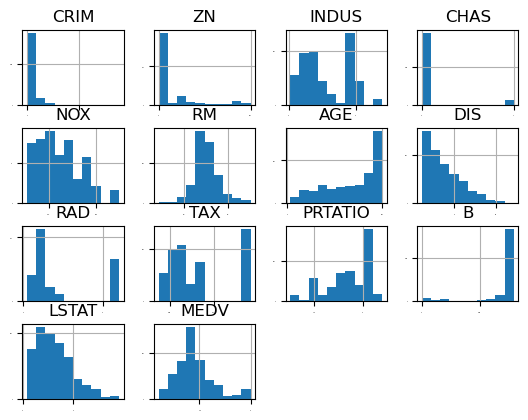

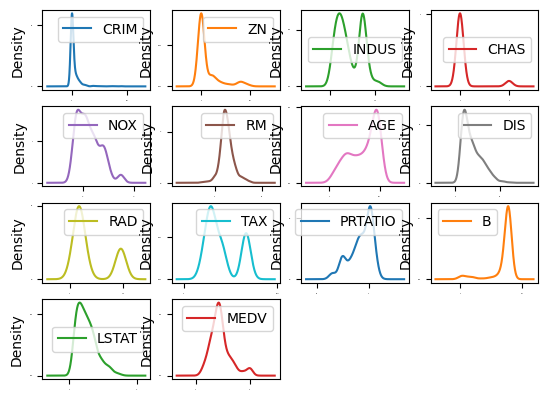

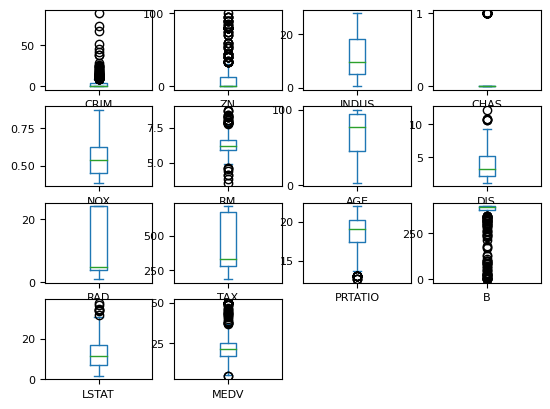

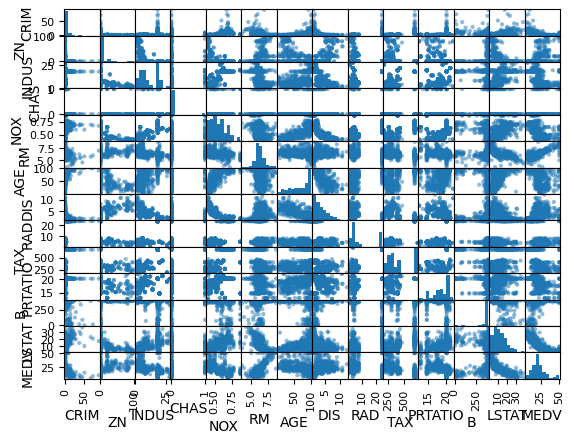

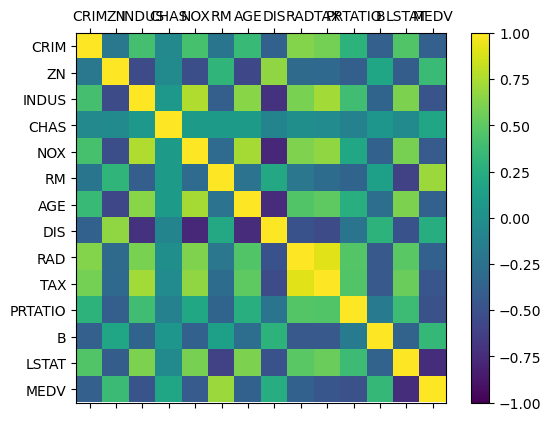

本部分耗时： 15.146328926086426


In [4]:
time1 = time.time()

# 数据维度
print(dataset.shape)

# 特征熟悉的字段类型
print(dataset.dtypes)

# 查看最开始的30条记录
# set_option('display.line_width', 120)
set_option('display.width', 120) # 注意，方法变了。
# set_option，设置print内容的宽度，不设置的话使用的是默认值，其中的内容可能被隐藏。还可设置显示的条数等内容
print(dataset.head(30))

# 描述性统计信息
set_option('display.precision', 1) # 设置显示的小数位
print(dataset.describe())

# 关联关系
set_option('display.precision', 2)
print(dataset.corr(method='pearson'))

# 直方图
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
pyplot.show()

# 密度图
dataset.plot(kind='density', subplots=True, layout=(4,4), sharex=False, fontsize=1)
pyplot.show()

# 箱线图
dataset.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, fontsize=8)
pyplot.show()

# 散点矩阵图
scatter_matrix(dataset)
pyplot.show()

# 相关矩阵图
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
ticks = np.arange(0, 14, 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
pyplot.show()



time2 = time.time()
print("本部分耗时：", time2 - time1)

# 3.数据准备
现成的数据集，需要做的处理相对简单。  

训练集：训练、验证  
测试集：测试。看看模型的泛化能力

【0.75-0.8】训练、验证；【0.2-0.25】测试  
分开：属性与目标值  

交叉验证：10份中9份训练、1份验证；10次  10折交叉验证，K折交叉验证、留一交叉验证  

# 4.评估算法

## 分离数据集，构建并评估模型

In [5]:
# 分离数据集
# test_size表示测试集的数量，为小数时表示占比，为整数时表示个数
array = dataset.values
X = array[:, 0:13]
Y = array[:, 13]
validation_size = 0.2
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,test_size=validation_size, random_state=seed)

# 评估算法 - 评估标准
# 10折交叉验证
# NMSE：归一化均方误差，评价回归模型，越小越好
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error' # NMSE

## 使用原始数据做模型

LR: -22.006009 (12.188886)
LASSO: -27.105803 (13.165915)
EN: -27.923014 (13.156405)
KNN: -39.808936 (16.507968)
CART: -28.938352 (20.785155)
SVM: -67.824705 (32.801530)


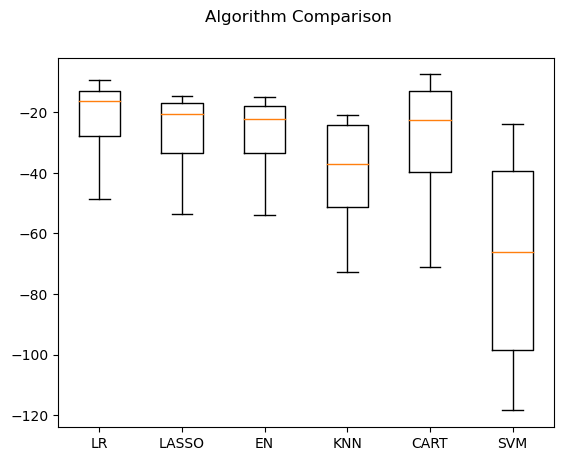

本部分耗时： 0.5414977073669434


In [6]:
time1 = time.time()

# 评估算法：使用能处理回归问题的6种基本算法
# 构建baseline，6个模型的10折交叉验证的结果箱线图，看结果的好坏
models = {}
models['LR'] = LinearRegression()
models['LASSO'] = Lasso()
models['EN'] = ElasticNet()
models['KNN'] = KNeighborsRegressor()
models['CART'] = DecisionTreeRegressor()
models['SVM'] = SVR()

results = []
for key in models:
    # kfold = KFold(n_splits=num_folds, random_state=seed)
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_result = cross_val_score(models[key], X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_result)
    print('%s: %f (%f)' % (key, cv_result.mean(), cv_result.std()))
    
# 评估算法 - 箱线图
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(models.keys())
pyplot.show()


time2 = time.time()
print("本部分耗时：", time2 - time1)

## 使用正态化的数据做分析

ScalerLR: -22.006009 (12.188886)
ScalerLASSO: -27.205896 (12.124418)
ScalerEN: -28.301160 (13.609110)
ScalerKNN: -21.456867 (15.016218)
ScalerCART: -26.430844 (18.498535)
ScalerSVM: -29.570433 (18.052964)


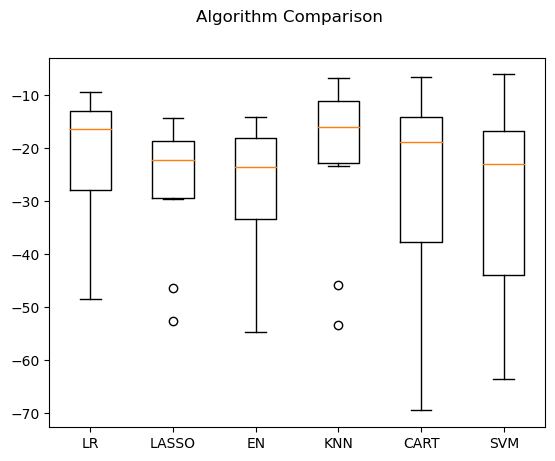

本部分耗时： 0.6852216720581055


In [7]:
time1 = time.time()

# 对原始数据做正态化处理，再进行上面的过程，看结果是否有改善
# 评估算法 - 正态化数据
pipelines = {}
pipelines['ScalerLR'] = Pipeline([('Scaler', StandardScaler()), ('LR', LinearRegression())])
pipelines['ScalerLASSO'] = Pipeline([('Scaler', StandardScaler()), ('LASSO', Lasso())])
pipelines['ScalerEN'] = Pipeline([('Scaler', StandardScaler()), ('EN', ElasticNet())])
pipelines['ScalerKNN'] = Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsRegressor())])
pipelines['ScalerCART'] = Pipeline([('Scaler', StandardScaler()), ('CART', DecisionTreeRegressor())])
pipelines['ScalerSVM'] = Pipeline([('Scaler', StandardScaler()), ('SVM', SVR())])
results = []

for key in pipelines:
    # kfold = KFold(n_splits=num_folds, random_state=seed)
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_result = cross_val_score(pipelines[key], X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_result)
    print('%s: %f (%f)' % (key, cv_result.mean(), cv_result.std()))
    
# 评估算法 - 箱线图
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(models.keys())
pyplot.show()


time2 = time.time()
print("本部分耗时：", time2 - time1)

## 超参数调整改进算法

In [8]:
time1 = time.time()

# 调参改进算法 - KNN算法，预定义超参数，做网格搜索看看哪些超参数效果更好
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]}
model = KNeighborsRegressor()
# kfold = KFold(n_splits=num_folds, random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X=rescaledX, y=Y_train)

print('最优：%s 使用%s' % (grid_result.best_score_, grid_result.best_params_))
cv_results = zip(grid_result.cv_results_['mean_test_score'],
                 grid_result.cv_results_['std_test_score'],
                 grid_result.cv_results_['params'])
for mean, std, param in cv_results:
    print('%f (%f) with %r' % (mean, std, param))
    
time2 = time.time()
print("本部分耗时：", time2 - time1)

最优：-19.497828658536584 使用{'n_neighbors': 1}
-19.497829 (15.769847) with {'n_neighbors': 1}
-19.977984 (13.803973) with {'n_neighbors': 3}
-21.270967 (14.833544) with {'n_neighbors': 5}
-21.577292 (14.952592) with {'n_neighbors': 7}
-21.001075 (14.701297) with {'n_neighbors': 9}
-21.490306 (14.866957) with {'n_neighbors': 11}
-21.268533 (14.454969) with {'n_neighbors': 13}
-21.968092 (14.209894) with {'n_neighbors': 15}
-22.739880 (14.492752) with {'n_neighbors': 17}
-23.506901 (14.903224) with {'n_neighbors': 19}
-24.240303 (15.156565) with {'n_neighbors': 21}
本部分耗时： 0.6715643405914307


# 5.优化模型
# 更合适的算法，更细致的调参

## 集成算法

ScaledAB: -15.284400 (7.588239)
ScaledAB-KNN: -16.136871 (10.770707)
ScaledAB-LR: -24.435239 (9.575721)
ScaledRFR: -12.427325 (8.932029)
ScaledETR: -9.099449 (6.493343)
ScaledGBR: -10.920419 (8.669631)


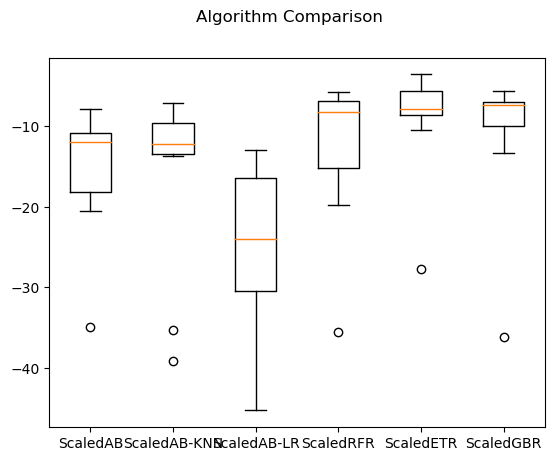

本部分耗时： 19.614035844802856


In [9]:
time1 = time.time()


# 集成算法
# AdaBoost、RandomForest、ExtraTrees、GradientBoosting都是集成算法
# 如下 base_estimator替换成了estimator
ensembles = {}
ensembles['ScaledAB'] = Pipeline([('Scaler', StandardScaler()), ('AB', AdaBoostRegressor())])
ensembles['ScaledAB-KNN'] = Pipeline([('Scaler', StandardScaler()),
                                       ('ABKNN', AdaBoostRegressor(estimator=KNeighborsRegressor(n_neighbors=3)))])
ensembles['ScaledAB-LR'] = Pipeline([('Scaler', StandardScaler()), ('ABLR', AdaBoostRegressor(LinearRegression()))])
ensembles['ScaledRFR'] = Pipeline([('Scaler', StandardScaler()), ('RFR', RandomForestRegressor())])
ensembles['ScaledETR'] = Pipeline([('Scaler', StandardScaler()), ('ETR', ExtraTreesRegressor())])
ensembles['ScaledGBR'] = Pipeline([('Scaler', StandardScaler()), ('GBR', GradientBoostingRegressor())])

results = []
for key in ensembles:
    # kfold = KFold(n_splits=num_folds, random_state=seed)
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_result = cross_val_score(ensembles[key], X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_result)
    print('%s: %f (%f)' % (key, cv_result.mean(), cv_result.std()))

# 集成算法 - 箱线图
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(ensembles.keys())
pyplot.show()

time2 = time.time()
print("本部分耗时：", time2 - time1)

## 集成算法调参

In [10]:
time1 = time.time()

# 集成算法调参
# 集成算法GBM - 调参
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = {'n_estimators': [10, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900]}
model = GradientBoostingRegressor()
# kfold = KFold(n_splits=num_folds, random_state=seed)
kfold = KFold(n_splits = num_folds, random_state = seed, shuffle = True)
grid = GridSearchCV(estimator = model, param_grid = param_grid, scoring = scoring, cv = kfold)
grid_result = grid.fit(X = rescaledX, y = Y_train)
print('最优：%s 使用%s' % (grid_result.best_score_, grid_result.best_params_))

# 集成算法ET - 调参
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = {'n_estimators': [5, 10, 20, 30, 40, 50, 60, 70, 80]}
model = ExtraTreesRegressor()
# kfold = KFold(n_splits=num_folds, random_state=seed)
kfold = KFold(n_splits = num_folds, random_state = seed, shuffle = True)
grid = GridSearchCV(estimator = model, param_grid = param_grid, scoring = scoring, cv = kfold)
grid_result = grid.fit(X = rescaledX, y = Y_train)
print('最优：%s 使用%s' % (grid_result.best_score_, grid_result.best_params_))

#训练模型
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
gbr = ExtraTreesRegressor(n_estimators=80)
gbr.fit(X=rescaledX, y=Y_train)

# 评估算法模型
rescaledX_validation = scaler.transform(X_validation)
predictions = gbr.predict(rescaledX_validation)
print(mean_squared_error(Y_validation, predictions))


time2 = time.time()
print("本部分耗时：", time2 - time1)

最优：-10.313216703954609 使用{'n_estimators': 400}
最优：-8.990683360433604 使用{'n_estimators': 60}
14.546083655024502
本部分耗时： 192.7255461215973


### 集成算法评估

In [11]:
time1 = time.time()

# 回归模型评估
scoring = 'neg_mean_absolute_error'
result = cross_val_score(model, X, Y, cv = kfold, scoring = scoring)
print('MAE: %.3f (%.3f)' % (result.mean(), result.std()))


scoring = 'neg_mean_squared_error'
result = cross_val_score(model, X, Y, cv = kfold, scoring = scoring)
print('MSE: %.3f (%.3f)' % (result.mean(), result.std()))

scoring = 'r2'
result = cross_val_score(model, X, Y, cv = kfold, scoring = scoring)
print('R2: %.3f (%.3f)' % (result.mean(), result.std()))


time2 = time.time()
print("本部分耗时：", time2 - time1)

MAE: -2.026 (0.265)
MSE: -9.480 (5.798)
R2: 0.886 (0.062)
本部分耗时： 12.93161392211914


# 6.确定模型

In [12]:
time1 = time.time()

# 2大类，7种算法用于回归
# 线性算法：线性回归、岭回归、套索回归、弹性网络回归
# 非线性算法：K近邻算法、分类与回归树、支持向量机
n_splits = 10
seed = 7
# kfold = KFold(n_splits=n_splits, random_state=seed)
kfold = KFold(n_splits = n_splits, random_state = seed, shuffle = True)


# 线性回归
model = LinearRegression()
scoring = 'neg_mean_squared_error'
result = cross_val_score(model, X, Y, cv = kfold, scoring = scoring)
print('Linear Regression: %.3f' % result.mean())

# 岭回归
model = Ridge()
scoring = 'neg_mean_squared_error'
result = cross_val_score(model, X, Y, cv = kfold, scoring = scoring)
print('Ridge Regression: %.3f' % result.mean())

# 套索回归
model = Lasso()
scoring = 'neg_mean_squared_error'
result = cross_val_score(model, X, Y, cv = kfold, scoring = scoring)
print('Lasso Regression: %.3f' % result.mean())

# 弹性网络回归
model = ElasticNet()
scoring = 'neg_mean_squared_error'
result = cross_val_score(model, X, Y, cv = kfold, scoring = scoring)
print('ElasticNet Regression: %.3f' % result.mean())

# K近邻算法
model = KNeighborsRegressor()
scoring = 'neg_mean_squared_error'
result = cross_val_score(model, X, Y, cv = kfold, scoring = scoring)
print('KNeighbors Regression: %.3f' % result.mean())

# 分类与回归树
model = DecisionTreeRegressor()
scoring = 'neg_mean_squared_error'
result = cross_val_score(model, X, Y, cv = kfold, scoring = scoring)
print('CART: %.3f' % result.mean())

# 支持向量机
model = SVR()
scoring = 'neg_mean_squared_error'
result = cross_val_score(model, X, Y, cv = kfold, scoring = scoring)
print('SVM: %.3f' % result.mean())


time2 = time.time()
print("本部分耗时：", time2 - time1)

Linear Regression: -23.747
Ridge Regression: -23.890
Lasso Regression: -28.746
ElasticNet Regression: -27.908
KNeighbors Regression: -38.852
CART: -23.908
SVM: -67.641
本部分耗时： 0.4703199863433838


LRS R2: 0.513 (0.143)
RDG R2: 0.510 (0.134)
LAS R2: 0.493 (0.116)
ELN R2: 0.493 (0.118)
KNR R2: 0.902 (0.047)
DTR R2: 0.938 (0.065)
SVR R2: 0.410 (0.089)


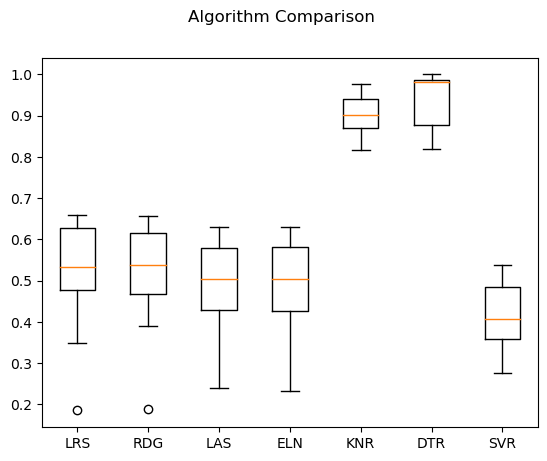

本部分耗时： 0.5107564926147461


In [13]:
time1 = time.time()


# 上述算法的汇总
# 将数据分为输入数据和输出结果
array = dataset.values
X = array[:, 0:8]
Y = array[:, 8]
num_folds = 10
seed = 7
# kfold = KFold(n_splits=num_folds, random_state=seed)
kfold = KFold(n_splits = num_folds, random_state = seed, shuffle = True)
models = {}

models['LRS'] = LinearRegression()
models['RDG'] = Ridge()
models['LAS'] = Lasso()
models['ELN'] = ElasticNet()
models['KNR'] = KNeighborsRegressor()
models['DTR'] = DecisionTreeRegressor()
models['SVR'] = SVR()

results = []

for name in models:
    scoring = 'r2'
    result = cross_val_score(models[name], X, Y, cv = kfold, scoring = scoring)
    results.append(result)
    # msg = '%s: %.3f' % (name, result.mean())
    msg = ('%s R2: %.3f (%.3f)' % (name, result.mean(), result.std()))
    print(msg)


# 图表显示
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(models.keys())
pyplot.show()


time2 = time.time()
print("本部分耗时：", time2 - time1)